In [8]:
import pandas as pd
import sklearn.model_selection as ms
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
import sklearn.neighbors as neighbors
from sklearn import metrics

# Tiền xử lý file

* Đổi định dạng text -> csv
* Thêm header
* Xóa dữ liệu bị lỗi

# Load dữ liệu

In [11]:
data_read = pd.read_csv("https://raw.githubusercontent.com/DangCao1999/ML-Study/master/BaiHoc/KNN%20Classification/BaiTapVnTuan8/breast-cancer-wisconsin-data.csv")

In [19]:
data_read.head()

,Id,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


# Câu 1: Chọn 3 cột dữ liệu  - Tạo 2 mảng numpy X và Y

In [33]:
#Khai báo 3 cột ngẫu nhiên
cols = ['Clump_thickness','Marginal_Adhesion', 'Single_Epithelial_Cell_Size']

In [34]:
X = data_read[cols]
y = data_read['Class']

In [35]:
X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size=0.2, random_state=4)

# Câu 2: Vẽ đồ thị, chọn ít nhất 1 đồ thị phân lớp rõ nhất

# Đồ thị 3d

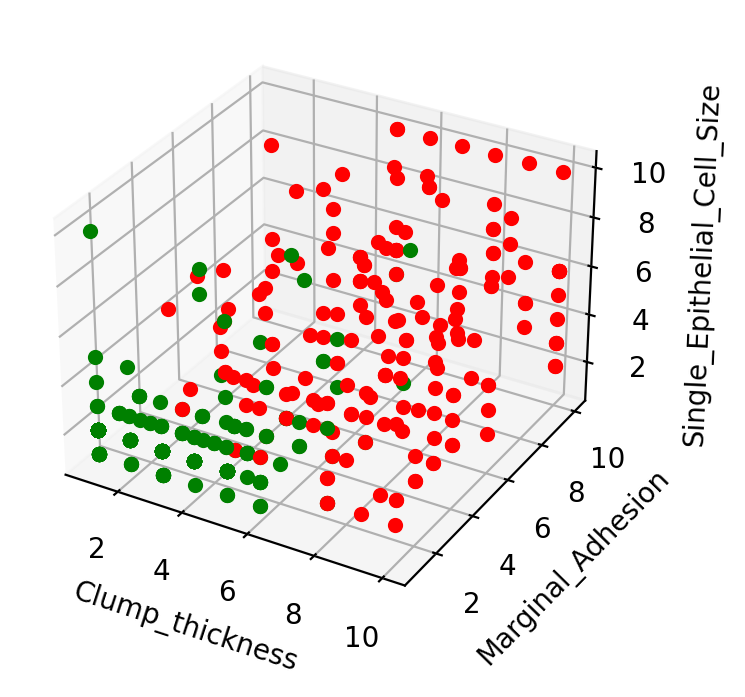

In [39]:
fig = plt.figure(dpi=200)
ax = fig.add_subplot(111, projection='3d')
for i in X_train.index:
    if y_train[i] == 2:
        color = 'green'
    else:
        color = 'red'
    
    ax.scatter(X_train['Clump_thickness'][i], X_train['Marginal_Adhesion'][i], X_train['Single_Epithelial_Cell_Size'][i], color=color)

ax.set_xlabel('Clump_thickness')
ax.set_ylabel('Marginal_Adhesion')
ax.set_zlabel('Single_Epithelial_Cell_Size')
plt.show()

# Câu 3

In [70]:
knn = neighbors.KNeighborsClassifier(n_neighbors=44)
knn.fit(X_train.values, y_train) 

KNeighborsClassifier(n_neighbors=44)

In [90]:
y_pred = knn.predict(X_test.values)
print(y_pred)

[4 2 2 2 2 2 2 4 4 4 2 2 2 2 4 4 2 2 2 2 2 4 2 2 2 4 2 2 4 4 2 4 2 2 2 4 2
 2 4 2 2 4 4 2 2 2 2 2 2 2 2 4 2 2 2 2 4 4 4 4 2 2 4 4 4 2 2 2 4 2 4 4 4 2
 2 2 4 2 2 2 2 2 2 2 2 2 2 4 4 2 4 2 2 4 4 4 2 4 4 2 4 2 2 2 2 2 2 2 2 2 2
 2 2 4 2 4 4 2 2 2 4 2 4 2 2 2 2 4 2 4 2 2 2 2 2 4 2 2 4 4]


# Câu 4

In [91]:
print(metrics.confusion_matrix(y_test,y_pred))
print("------------------------")
print( "Accuracy : " + str(np.round(metrics.accuracy_score(y_test,y_pred),4)))

[[87  1]
 [ 6 46]]
------------------------
Accuracy : 0.95


## Giải thích

* Độ chính xác là 0.95 => 95%
* Đối với 88 dữ liệu bệnh nhân bị ung thư thì có 1 bênh nhân mô hình đã dữ đoán sai
* Đối với 52 dữ liệu bệnh nhân không mắc bệnh ung thư thì có 6 bênh nhân mô hình đã dự đoán sai thành có mắc bệnh